In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
df_we = pd.read_csv('final_df.csv')
df_e = pd.read_csv('final_encoded.csv')

In [20]:
df_we

,okrug,raion,price,rooms,metro_time,info_total_area,info_floor,rent_jkh,rent_prepayment,rent_term,rent_living_conditions,year_built_interval
0,ЦАО,р-н Пресненский,470000,2,7.0,73.0,41,включена (счётчики включены),1 месяц,от года,можно с детьми,1991-2025
1,ЦАО,р-н Пресненский,270000,3,13.0,68.0,23,включена (без счётчиков),1 месяц,от года,можно с детьми,1991-2025
2,СЗАО,р-н Митино,30000,1,9.0,40.0,3,включена (счётчики включены),1 месяц,от года,"ни с детьми, ни с животными",1991-2025
3,ЮАО,р-н Донской,75000,2,13.0,60.0,3,включена (без счётчиков),1 месяц,от года,"ни с детьми, ни с животными",1945-1970
4,САО,р-н Беговой,29000,студия,7.0,12.0,11,включена (счётчики включены),1 месяц,от года,"ни с детьми, ни с животными",1991-2025
...,...,...,...,...,...,...,...,...,...,...,...,...
1385,ЮВАО,р-н Южнопортовый,65000,студия,5.0,27.0,4,включена (без счётчиков),1 месяц,от года,"ни с детьми, ни с животными",1991-2025
1386,САО,р-н Дмитровский,65000,1,24.0,35.7,21,включена (без счётчиков),1 месяц,от года,"ни с детьми, ни с животными",1991-2025
1387,СЗАО,р-н Северное Тушино,65000,1,6.0,40.0,14,включена (без счётчиков),1 месяц,от года,можно с детьми,1991-2025
1388,ЗАО,р-н Очаково-Матвеевское,64000,студия,7.0,22.0,11,включена (без счётчиков),1 месяц,от года,"ни с детьми, ни с животными",1991-2025


In [8]:
desc = df_we[['price', 'metro_time', 'info_total_area']].describe()

In [11]:
selected_columns = ['price', 'metro_time', 'info_total_area']

desc = df_we[selected_columns].describe()

median = df_we[selected_columns].median().to_frame().T
median.index = ['median']

mode = df_we[selected_columns].mode().iloc[0].to_frame().T
mode.index = ['mode']

iqr = (desc.loc['75%'] - desc.loc['25%']).to_frame().T
iqr.index = ['IQR']

desc_full = pd.concat([desc, median, mode, iqr])

desc_full = desc_full.T

print(desc_full)

                  count          mean           std      min      25%  \
price            1390.0  68962.690647  46271.297555  20000.0  50000.0   
metro_time       1390.0      8.186331      4.513857      1.0      5.0   
info_total_area  1390.0     39.791928     17.160327     11.0     30.0   

                     50%      75%       max   median     mode      IQR  
price            60000.0  68000.0  750000.0  60000.0  65000.0  18000.0  
metro_time           7.0     11.0      25.0      7.0      6.0      6.0  
info_total_area     38.0     45.0     222.0     38.0     40.0     15.0  


<Axes: >

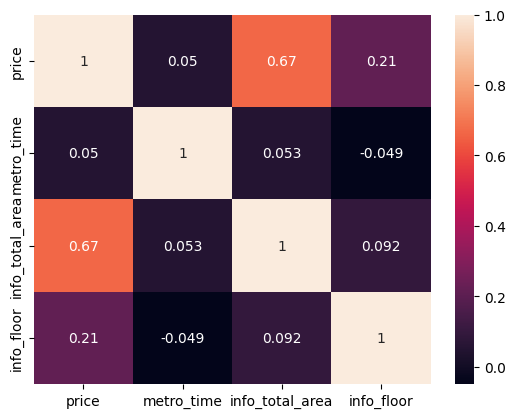

In [12]:
sns.heatmap(df_we[['price', 'metro_time', 'info_total_area', 'info_floor']].corr(), annot=True)

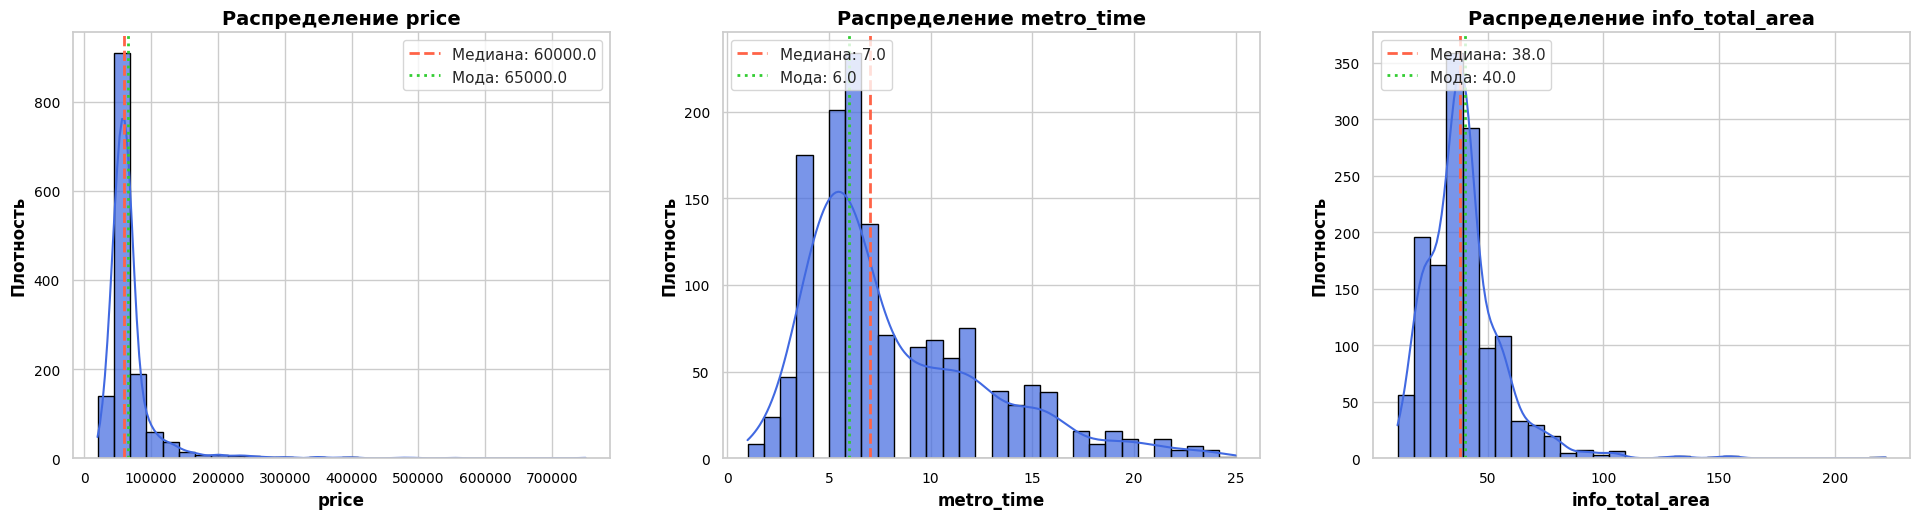

In [72]:
sns.set(style="whitegrid")
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

columns = ['price', 'metro_time', 'info_total_area']

for i, col in enumerate(columns):
    sns.histplot(
        data=df_we[col],
        bins=30,
        kde=True,
        color='royalblue',
        alpha=0.7,
        ax=axes[i],
        edgecolor='black'
    )

    median = df_we[col].median()
    mode = df_we[col].mode()[0]
    axes[i].axvline(median, color='tomato', linestyle='--', linewidth=2, label=f'Медиана: {median:.1f}')
    axes[i].axvline(mode, color='limegreen', linestyle=':', linewidth=2, label=f'Мода: {mode:.1f}')

    axes[i].set_title(f'Распределение {col}', fontsize=14, fontweight='bold', color='black')
    axes[i].set_xlabel(col, fontsize=12, fontweight='bold', color='black')
    axes[i].set_ylabel('Плотность', fontsize=12, fontweight='bold', color='black')
    axes[i].legend(loc='upper right' if col == 'price' else 'upper left')

    axes[i].ticklabel_format(axis='x', style='plain', scilimits=(0,0))
    axes[i].tick_params(axis='x', labelsize=10, labelcolor='black', labelrotation=0)
    axes[i].tick_params(axis='y', labelsize=10, labelcolor='black')

plt.tight_layout(pad=3.0)
plt.show()


In [19]:
def calculate_stats(df, columns):
    results = []
    for col in columns:
        data = df_we[col].dropna()
        n = len(data)
        mean = data.mean()
        std = data.std(ddof=0)  # Смещенное стандартное отклонение (N в знаменателе)

        # Коэффициент асимметрии (A)
        skew = np.mean(((data - mean) / std)**3)

        # Эксцесс (E)
        kurtosis = np.mean(((data - mean) / std)**4) - 3

        results.append({
            'Переменная': col,
            'Асимметрия (A)': round(skew, 4),
            'Эксцесс (E)': round(kurtosis, 4),
            'Наблюдения': n
        })

    return pd.DataFrame(results)

stats_df_we = calculate_stats(df_we, ['price', 'metro_time', 'info_total_area'])
stats_df_we.set_index('Переменная', inplace=True)

print(stats_df_we.to_markdown(tablefmt="grid"))

+-----------------+------------------+---------------+--------------+
| Переменная      |   Асимметрия (A) |   Эксцесс (E) |   Наблюдения |
+=================+==================+===============+==============+
| price           |           6.3904 |       60.4503 |         1390 |
+-----------------+------------------+---------------+--------------+
| metro_time      |           1.1826 |        0.9767 |         1390 |
+-----------------+------------------+---------------+--------------+
| info_total_area |           2.4783 |       15.1203 |         1390 |
+-----------------+------------------+---------------+--------------+


In [64]:
df = df_we

In [63]:
df_we['rent_living_conditions'] = df_we['rent_living_conditions'].replace(
    {'ни с детьми, ни с животными': 'ни с кем'}
)

<ipython-input-70-082b54849cc5>:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), fontweight='bold', color='black', fontsize=8 if var == 'info_floor' else 10)
<ipython-input-70-082b54849cc5>:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), fontweight='bold', color='black', fontsize=8 if var == 'info_floor' else 10)
<ipython-input-70-082b54849cc5>:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), fontweight='bold', color='black', fontsize=8 if var == 'info_floor' else 10)
<ipython-input-70-082b54849cc5>:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using 

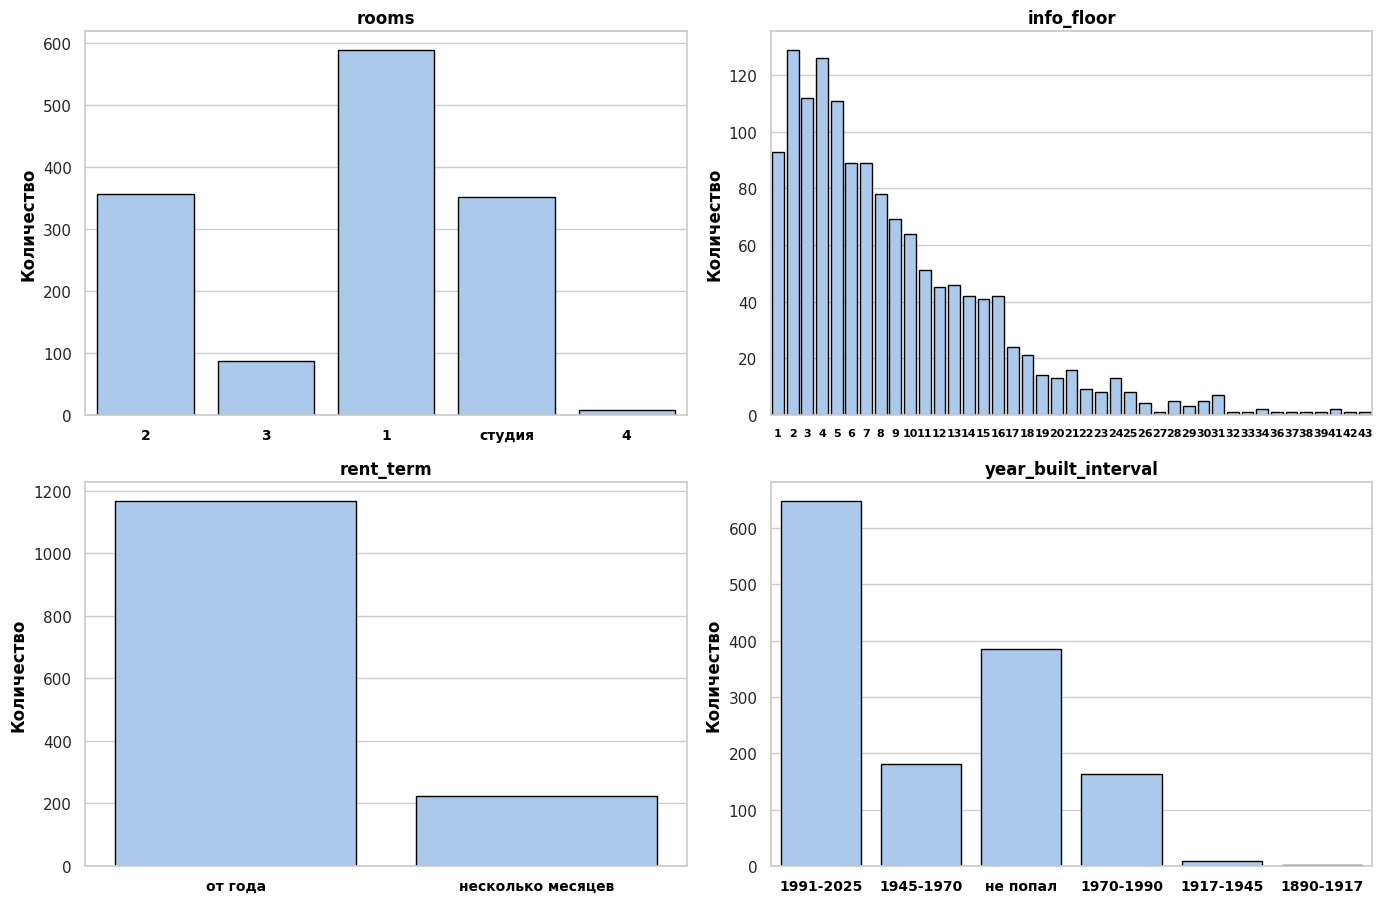

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns

ordinal_vars = ['rooms', 'info_floor', 'rent_term', 'year_built_interval']

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

for ax, var in zip(axes.flatten(), ordinal_vars):
    bars = sns.countplot(x=df_we[var], ax=ax, edgecolor='black')
    ax.set_title(var, fontweight='bold', color='black')
    ax.set_xlabel('')
    ax.set_ylabel('Количество', fontweight='bold', color='black')

    ax.set_xticklabels(ax.get_xticklabels(), fontweight='bold', color='black', fontsize=8 if var == 'info_floor' else 10)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


<ipython-input-71-cb22e2525547>:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=80, fontsize=8, fontweight='bold', color='black')
<ipython-input-71-cb22e2525547>:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), fontweight='bold', color='black')
<ipython-input-71-cb22e2525547>:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), fontweight='bold', color='black')
<ipython-input-71-cb22e2525547>:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=80, ha='right', fontsize=10, fontwei

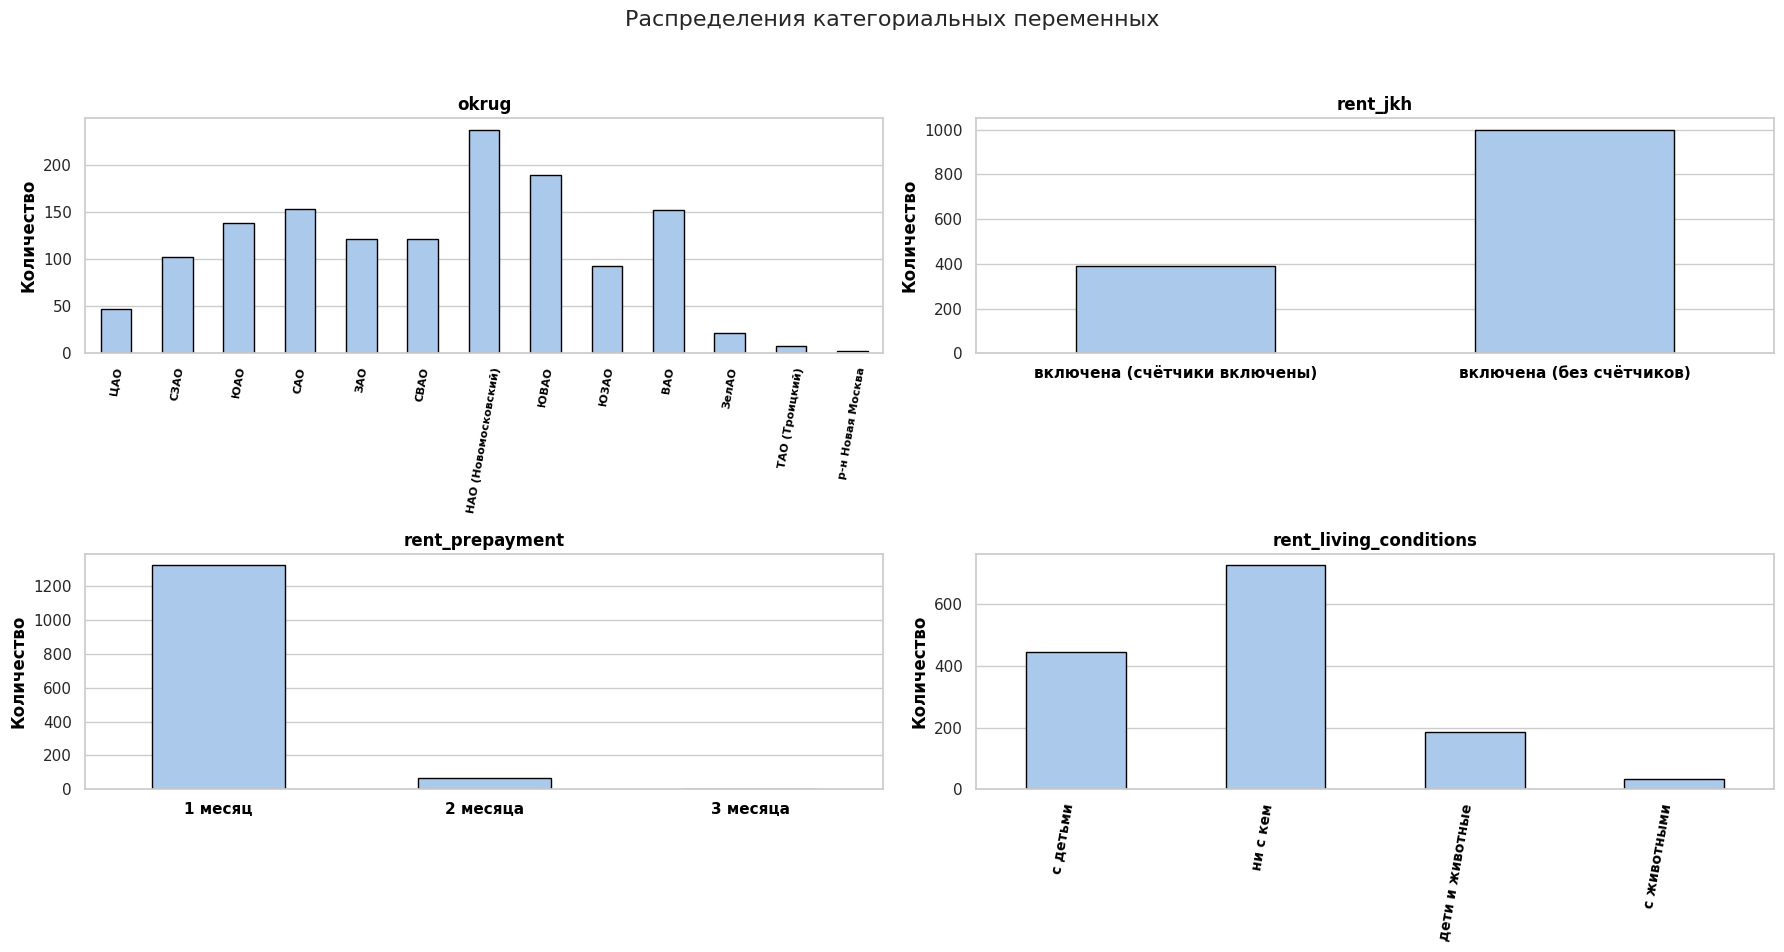

In [71]:
df_we['rent_living_conditions'] = df_we['rent_living_conditions'].replace(
    {'ни с детьми ни с животными': 'ни с кем'}
)

categorical_vars = ['okrug', 'rent_jkh', 'rent_prepayment', 'rent_living_conditions']

fig, axes = plt.subplots(2, 2, figsize=(18, 10))
fig.suptitle('Распределения категориальных переменных', fontsize=16)

axes = axes.flatten()

for ax, var in zip(axes, categorical_vars):
    bar_width = 0.8 if var == 'raion' else 0.5
    bars = sns.countplot(x=df_we[var], ax=ax, width=bar_width, edgecolor='black')

    title = 'district' if var == 'raion' else var
    ax.set_title(title, fontweight='bold', color='black')
    ax.set_xlabel('')
    ax.set_ylabel('Количество', fontweight='bold', color='black')

    if var == 'raion':
        ax.set_xticklabels([])

    elif var == 'okrug':
        ax.set_xticklabels(ax.get_xticklabels(), rotation=80, fontsize=8, fontweight='bold', color='black')

    elif var == 'rent_living_conditions':
        ax.set_xticklabels(ax.get_xticklabels(), rotation=80, ha='right', fontsize=10, fontweight='bold', color='black')
        ax.margins(x=0.3)
        ax.set_xlim(-0.5, len(df_we[var].unique()) - 0.5)

    else:
        ax.set_xticklabels(ax.get_xticklabels(), fontweight='bold', color='black')

for j in range(len(categorical_vars), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()
